<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 3*

# 📝 Assignment
---

# Evaluation Metrics for Classification

### 1) Kaggle 챌린지를 이어서 진행합니다.
- **(Urclass Quiz) 다음 조건에서 F beta score를 구하고 제출하세요.**
    - TP = 4442, TN = 6165, FP = 1515, FN = 1930, 재현율에 정밀도의 2배 가중치를 부여합니다.

In [28]:
TP = 4442
TN = 6165
FP = 1515
FN = 1930

In [29]:
#precision
precision = TP/TP+FP
precision

1516.0

In [30]:
#recall
recall = TP/TP+FN
recall

1931.0

In [31]:
#F beta score
β = 2
Fβ = (1+β**2) * (precision * recall) / (β**2 * precision + recall)
Fβ

1830.7667292057536

### 2) 모델을 학습한 후 Confusion matrix를 그리고 해석하세요
- 임계값을 조정한 후 confusion matrix를 그려보세요
- **(Urclass Quiz) 임계값을 증가시킬때 positive 범주의 재현율 변화 중 올바른 설명을 고르세요.**
    1. 증가
    2. 감소
    3. 변화가 없다


In [27]:
from google.colab import files
myfile = files.upload()

Saving submission.csv to submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
Saving train_labels.csv to train_labels (1).csv


In [153]:
import warnings
warnings.filterwarnings(action='ignore')

In [186]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_labels = pd.read_csv('train_labels.csv')
submission = pd.read_csv('submission.csv')

In [187]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size = len(test), random_state = 2)
y_train_labels, y_val_labels = train_test_split(train_labels, test_size =len(test), random_state =2 )

In [188]:
#Confusion matrix 생성을 위해 데이터 사이즈 통일
train.shape, val.shape, test.shape, y_train_labels.shape, y_val_labels .shape

((14050, 38), (28104, 38), (28104, 38), (14050, 2), (28104, 2))

In [189]:
#EDA, 특성공학
def feature_eng(df) :
    behaviorals = [col for col in df.columns if 'behaviorals' in col]
    df['behaviorals'] = df[behaviorals].sum(axis = 1)
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns = dels, inplace = True)
    return df
train = feature_eng(train)
val = feature_eng(val)
test = feature_eng(test)

In [190]:
target = 'vacc_h1n1_f'
features = train.columns
X_train = train[features]
X_val = val[features]
y_train = y_train_labels[target]
y_val = y_val_labels[target]
X_test = test[features]

In [95]:
pip install category_encoders

In [191]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1),
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('검증정확도 : ', accuracy_score(y_val, y_pred))

검증정확도 :  0.819064901793339


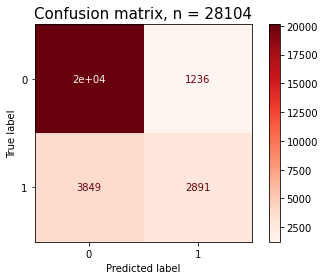

In [192]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Reds,
                            ax=ax)
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [193]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:,1]
print('재현율 : ', recall_score(y_val, y_pred))

재현율 :  0.42893175074183976


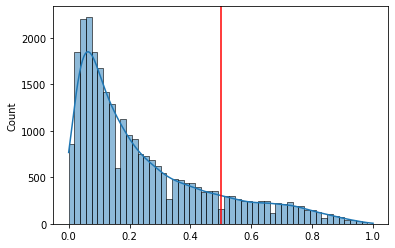

In [194]:
import seaborn as sns
ax = sns.histplot(y_pred_proba, kde = True)
threshold = 0.5
ax.axvline(threshold, color='red')
#pd.Series(y_pred).value_counts()

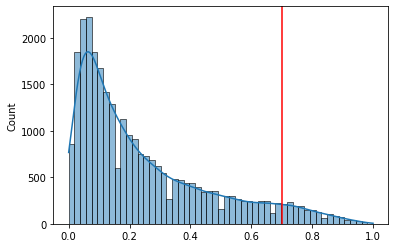

In [195]:
import seaborn as sns
ax = sns.histplot(y_pred_proba, kde = True)
threshold = 0.7
ax.axvline(threshold, color='red')

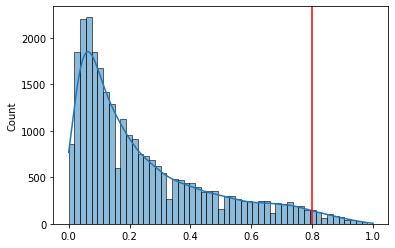

In [196]:
import seaborn as sns
ax = sns.histplot(y_pred_proba, kde = True)
threshold = 0.8
ax.axvline(threshold, color='red')
#임계값이 증가할수록 재현율은 감소한다.

### 3) 랜덤포레스트의 n_estimator를 1, 10, 100, 1000으로 바꾸어 가며 positive 범주의 predict_proba를 비교해 보세요
- 하이퍼파라미터는 다음과 같이 설정합니다.
    - n_jobs=-1, random_state=10, max_depth=None, oob_score=True
- **(Urclass Quiz) 확률값들의 분포의 변화를 아래 보기 중에서 고르세요**
    1. 다양해진다
    2. 변화가없다


In [197]:
#n_estimators = 트리의 개수
def pipe(data) :
  pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators = data, n_jobs=-1, random_state=10, max_depth=None, oob_score=True),
  )
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_val)
  pipe.predict_proba(X_val)[:, 1]
  return print(pipe.predict_proba(X_val)[:, 1])

In [198]:
pipe(1), pipe(10), pipe(100), pipe(1000)

[0. 0. 0. ... 0. 0. 0.]
[0.3 0.1 0.  ... 0.  0.1 0. ]
[0.24 0.09 0.03 ... 0.1  0.09 0.  ]
[0.228 0.084 0.026 ... 0.04  0.097 0.004]


(None, None, None, None)

### 4) 두개 이상의 다른 분류 모델을 학습시켜 ROC curve, AUC 점수를 비교하고 설명합니다.
- 더 좋은 결과가 나오는 모델을 사용해서 캐글에 제출하세요
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**

In [199]:
from category_encoders.one_hot import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth = 10, random_state=2)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:,1]
print('검증정확도 : ', accuracy_score(y_val, y_pred))

검증정확도 :  0.8097779675491034


In [200]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.7749234443866023

In [201]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-Out)' : fpr,
    'TPR(Recall)' : tpr,
    'Threshold' : threshold
    })
roc

,FPR(Fall-Out),TPR(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.024808,0.109644,1.000000
2,0.026025,0.121068,0.976190
3,0.027008,0.131899,0.972222
4,0.028225,0.166024,0.963303
...,...,...,...
99,0.895057,0.929822,0.022646
100,0.912984,0.934718,0.022523
101,0.915887,0.938576,0.022222
102,0.938588,0.946142,0.015625


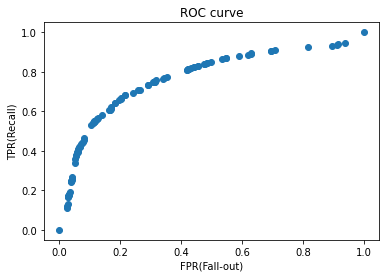

In [202]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [203]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:,1]
print('검증정확도 : ', accuracy_score(y_val, y_pred))

검증정확도 :  0.819064901793339


In [204]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.8225879721120475

In [205]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-Out)' : fpr,
    'TPR(Recall)' : tpr,
    'Threshold' : threshold
    })
roc

,FPR(Fall-Out),TPR(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.000047,0.000148,1.000000
2,0.000047,0.000593,0.980000
3,0.000047,0.000890,0.975000
4,0.000094,0.002077,0.970000
...,...,...,...
534,0.921925,0.992730,0.022500
535,0.960775,0.997329,0.020000
536,0.960869,0.997329,0.013333
537,0.987409,0.999258,0.010000


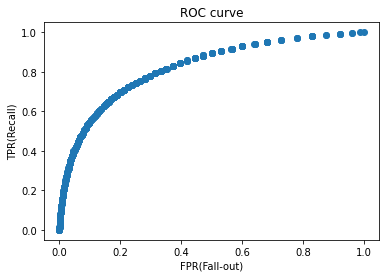

In [206]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

In [207]:
y_pred_test = pipe.predict(X_test)
submission[target] = y_pred_test
submission.to_csv('kaggle_submission.csv', index=False)

## 🔥 도전과제(Github - Discussion)

### 5) confusion matrix, classification report 등을 그려 보시고, 각 평가지표들에 대해 최대한 분석하고 precision과 recall 중 어느 것을 높이는 방향으로 모델링 해야할지 논의해 보세요. 

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 